## Optimal scale evaluation for single-cell Local ID estimation

This notebook explores the choice of neighborhood size k for Local Intrinsic Dimension (LID) estimation in single-cell data, using a small dataset from human liver bud as an example. For each cell, LID is computed across a range of k values. At low k, LID is affected by under-sampling; at high k, neighborhoods become highly overlapping and LID converges toward the global intrinsic dimension. An intermediate region emerges where LID values are more stable. We identify this “optimal” k-range by locating where the derivative of the mean LID with respect to k approaches zero, indicating a stable regime of local ID.

### Import

In [48]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

import collections
from tqdm import tqdm
import dadapy
from sklearn.neighbors import NearestNeighbors

from scipy.stats import pearsonr
import pickle
import shutil


import importlib
import functions_IDEAS  
importlib.reload(functions_IDEAS)  
from functions_IDEAS import *

### Human Liver Bud

Load the dataset

In [49]:
adata = sc.read('../Datasets/Human_LiverBud.h5ad')

sc.pp.normalize_total(adata, target_sum=1e6)
collections.Counter(adata.obs.coarse_label.values), len(adata)

(Counter({'HE': 113, 'IH': 81, 'MH': 81, 'iPS': 80, 'DE': 70}), 425)

In [50]:
adata

AnnData object with n_obs × n_vars = 425 × 19020
    obs: 'cell', 'fine_label', 'coarse_label'
    var: 'Gene name'

Evaluate local ID across different k values with the 'local_id_across_scales' function, then plot the obtained values and the derivative to identify the optimal k with the 'optimal scale' function. The k_grid parameter defaults to log-spaced range of k values (from ~3% of the dataset size up to a maximum of 2000 neighbors). 

To reduce computation time, LID can be estimated on a PCA-reduced representation of the data by setting pca_n_comps. The default is 0, meaning that no dimensionality reduction is applied. We recommend avoiding excessively small PCA dimensions, as this may distort the intrinsic dimensionality estimation.

In [51]:
k_grid = np.logspace(np.log10(10), np.log10(425), 50).astype(int)
k_grid, ids = local_id_across_scales(adata, pca_n_comps = 400, 
                                k_grid = k_grid, save = True)


PCA dimensionality reduction: from 19020 genes to 400 principal components.
Finding 425 nearest neighbors...
Nearest-neighbors grid used to investigate ID across scales:  [ 10  10  11  12  13  14  15  17  18  19  21  23  25  27  29  31  34  36
  39  42  46  49  53  58  62  67  73  78  85  91  99 107 115 124 134 145
 157 169 183 197 213 230 248 268 289 312 337 364 393 425]


100%|██████████| 425/425 [00:52<00:00,  8.10it/s]


/Users/maddalenastaiano/Desktop/computeID/computeID/functions_IDEAS.py:427: RuntimeWarning: invalid value encountered in divide
  increments = np.diff(y)/np.diff(k_grid)


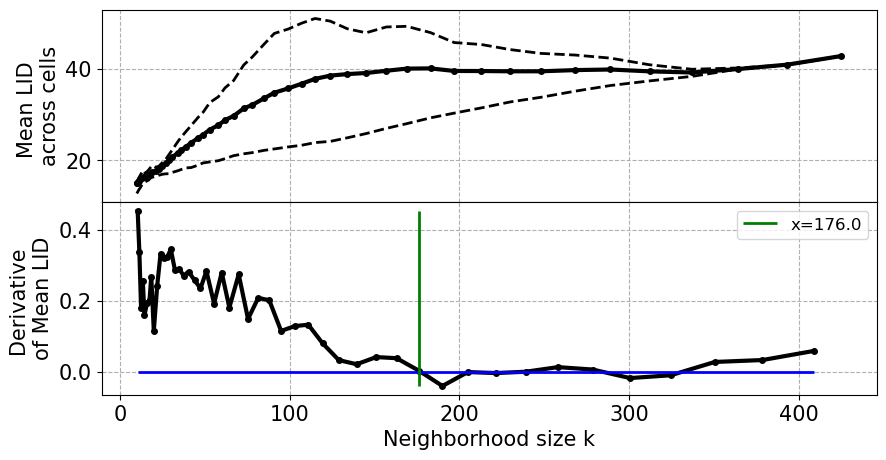

In [52]:
k_opt = optimal_scale(k_grid, ids, fontsize = 15)

Optimal scale:

In [53]:
k_opt

176.0

In [54]:
k_grid = load_npy(filename = 'optimal_scale_kgrid_out')
ids = load_npy(filename = 'optimal_scale_ids_out')

Successfully loaded from: optimal_scale_kgrid_out.npy
Successfully loaded from: optimal_scale_ids_out.npy
